# Caso de estudio: Choques y siniestros de Nuevo León.

## Cleaning de los datos

### Librerías

In [2]:
import pandas as pd
import numpy as np

### Importar datos

In [4]:
data = pd.read_excel("BD_HackMTY_ChoquesYSiniestrosMONTERREY_2020_V2.xlsx")
data

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
0,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,2018-01-03
1,D00007,25.660916,-100.282504,64820,Avenida Revolución,Valle del Huajuco,COLISION Y/O VUELCO,Auto,PLATA,2006,NaN,NaN,2018,1,22,LUNES,12,NUEVO LEÓN,MONTERREY,2018-01-22
2,D00011,25.724544,-100.373691,64619,ABEDUL,VILLA DORADA,COLISION Y/O VUELCO,Auto,ROJO,2015,Bajo,Costado der central,2018,1,1,LUNES,0,NUEVO LEÓN,MONTERREY,2018-01-01
3,D00012,25.631471,-100.300988,64760,ALFONSO REYES,15 de Septiembre,COLISION Y/O VUELCO,Auto,BLANCO,2000,Sin daño,Costado izq delantero,2018,1,1,LUNES,2,NUEVO LEÓN,MONTERREY,2018-01-01
4,D00019,25.728476,-100.333627,64250,Pablo Hernández,FERROCARRILERA,COLISION Y/O VUELCO,Auto,BLANCO,2015,Bajo,Costado izq delantero,2018,1,1,LUNES,9,NUEVO LEÓN,MONTERREY,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,D116002,NaN,NaN,\N,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,CENTRO,COLISION Y/O VUELCO,Auto,AZUL,2007,Bajo,Costado der delantero,2016,1,10,DOMINGO,22,NUEVO LEÓN,MONTERREY,2016-01-10
43426,D116003,NaN,NaN,\N,PROV. 19765 / Roel Francisco Salinas Madrigal ...,FUENTES DEL VALLE,COLISION Y/O VUELCO,Auto,GRIS,2008,Sin daño,NaN,2016,3,6,DOMINGO,22,NUEVO LEÓN,MONTERREY,2016-03-06
43427,D116004,25.660844,-100.312296,64720,San Luis Potosí,Independencia,COLISION Y/O VUELCO,Auto,GRIS,2008,Bajo,Costado der trasero,2016,8,30,MARTES,21,NUEVO LEÓN,MONTERREY,2016-08-30
43428,D116012,25.745930,-100.360152,64330,tlatelolco,unidad habitacional morelos,COLISION Y/O VUELCO,Auto,vino /dora,2003,Sin daño,Costado der trasero,2016,12,29,JUEVES,19,NUEVO LEÓN,MONTERREY,2016-12-29


In [13]:
data_clean = data.copy()
data_clean

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
0,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,2018-01-03
1,D00007,25.660916,-100.282504,64820,Avenida Revolución,Valle del Huajuco,COLISION Y/O VUELCO,Auto,PLATA,2006,NaN,NaN,2018,1,22,LUNES,12,NUEVO LEÓN,MONTERREY,2018-01-22
2,D00011,25.724544,-100.373691,64619,ABEDUL,VILLA DORADA,COLISION Y/O VUELCO,Auto,ROJO,2015,Bajo,Costado der central,2018,1,1,LUNES,0,NUEVO LEÓN,MONTERREY,2018-01-01
3,D00012,25.631471,-100.300988,64760,ALFONSO REYES,15 de Septiembre,COLISION Y/O VUELCO,Auto,BLANCO,2000,Sin daño,Costado izq delantero,2018,1,1,LUNES,2,NUEVO LEÓN,MONTERREY,2018-01-01
4,D00019,25.728476,-100.333627,64250,Pablo Hernández,FERROCARRILERA,COLISION Y/O VUELCO,Auto,BLANCO,2015,Bajo,Costado izq delantero,2018,1,1,LUNES,9,NUEVO LEÓN,MONTERREY,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,D116002,NaN,NaN,\N,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,CENTRO,COLISION Y/O VUELCO,Auto,AZUL,2007,Bajo,Costado der delantero,2016,1,10,DOMINGO,22,NUEVO LEÓN,MONTERREY,2016-01-10
43426,D116003,NaN,NaN,\N,PROV. 19765 / Roel Francisco Salinas Madrigal ...,FUENTES DEL VALLE,COLISION Y/O VUELCO,Auto,GRIS,2008,Sin daño,NaN,2016,3,6,DOMINGO,22,NUEVO LEÓN,MONTERREY,2016-03-06
43427,D116004,25.660844,-100.312296,64720,San Luis Potosí,Independencia,COLISION Y/O VUELCO,Auto,GRIS,2008,Bajo,Costado der trasero,2016,8,30,MARTES,21,NUEVO LEÓN,MONTERREY,2016-08-30
43428,D116012,25.745930,-100.360152,64330,tlatelolco,unidad habitacional morelos,COLISION Y/O VUELCO,Auto,vino /dora,2003,Sin daño,Costado der trasero,2016,12,29,JUEVES,19,NUEVO LEÓN,MONTERREY,2016-12-29


### Valores nulos

In [14]:
data_clean.isna().sum()

FOLIO_ID                  0
LAT                     980
LONG                    980
CODIGO POSTAL            40
CALLE                     1
COLONIA                  19
CAUSA SINIESTRO           0
TIPO VEHICULO            36
COLOR                    59
MODELO_VEHICULO          34
NIVEL DAÑO VEHICULO     303
PUNTO DE IMPACTO       3805
AÑO                       0
MES                       0
DÍA NUMERO                0
DIA                       0
HORA                      0
ESTADO                    0
CIUDAD_APROXIMADA         0
DATE                      0
dtype: int64

Se puede observar que la base de datos es bastante completa, solamente destacan la cantidad de valores nulos las variables de coordenadas y el punto de impacto. Opté por no eliminar estos registros debido a que la información de estos para otras variables es valiosa.

### Eliminar columnas redundantes

#### Estado

In [15]:
data_clean['ESTADO'].unique()

array(['NUEVO LEÓN'], dtype=object)

In [16]:
data_clean = data_clean.drop(columns=['ESTADO'])

In [18]:
data_clean.columns

Index(['FOLIO_ID', 'LAT', 'LONG', 'CODIGO POSTAL', 'CALLE', 'COLONIA',
       'CAUSA SINIESTRO', 'TIPO VEHICULO', 'COLOR', 'MODELO_VEHICULO',
       'NIVEL DAÑO VEHICULO', 'PUNTO DE IMPACTO', 'AÑO', 'MES', 'DÍA NUMERO',
       'DIA', 'HORA', 'CIUDAD_APROXIMADA', 'DATE'],
      dtype='object')

#### Ciudad aproximada

In [19]:
data_clean['CIUDAD_APROXIMADA'].unique()

array(['MONTERREY'], dtype=object)

In [20]:
data_clean = data_clean.drop(columns=['CIUDAD_APROXIMADA'])

In [21]:
data_clean.columns

Index(['FOLIO_ID', 'LAT', 'LONG', 'CODIGO POSTAL', 'CALLE', 'COLONIA',
       'CAUSA SINIESTRO', 'TIPO VEHICULO', 'COLOR', 'MODELO_VEHICULO',
       'NIVEL DAÑO VEHICULO', 'PUNTO DE IMPACTO', 'AÑO', 'MES', 'DÍA NUMERO',
       'DIA', 'HORA', 'DATE'],
      dtype='object')

In [ ]:
data_clean['DATE'].astype()

In [60]:
dates = data_clean['DATE']
dates = dates.sort_values()
dates = dates.reset_index(drop=True)
dates

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
43425   2018-06-30
43426   2018-06-30
43427   2018-06-30
43428   2018-06-30
43429   2018-06-30
Name: DATE, Length: 43430, dtype: datetime64[ns]

In [68]:
sin_per_day = dates.value_counts().sort_index()
sin_per_day

2016-01-01    24
2016-01-02    34
2016-01-03    22
2016-01-04    48
2016-01-05    57
              ..
2018-06-26    33
2018-06-27    44
2018-06-28    54
2018-06-29    42
2018-06-30    40
Name: DATE, Length: 911, dtype: int64

In [73]:
max(sin_per_day)

150

In [77]:
sin_per_day[sin_per_day==max(sin_per_day)]

2017-05-04    150
Name: DATE, dtype: int64

In [81]:
data_clean[data_clean['DATE']=='2017-05-04']

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,DATE
7042,D17544,25.622544,-100.302250,64900,Plaza de la Concordia 5617,jardines del paseo,COLISION Y/O VUELCO,Auto,marron,2012,Bajo,Toldo,2017,5,4,JUEVES,7,2017-05-04
12563,D32890,25.627110,-100.297209,64900,Plan de Galeana 2839,REPUBLICA,COLISION Y/O VUELCO,Auto,GRIS,2007,Bajo,Cofre,2017,5,4,JUEVES,8,2017-05-04
12567,D32915,25.646270,-100.292251,64840,Avenida Luis Elizondo,tecnologico,COLISION Y/O VUELCO,Auto,BLANCO,2014,Bajo,Costado izq trasero,2017,5,4,JUEVES,3,2017-05-04
12568,D32916,25.621533,-100.300494,64920,Cornalina 5436,FRACC PASEO RESIDENCIAL 5 SECTOR,FENOMENOS DE LA NATURALEZA,Auto,PLATA,2016,Bajo,Toldo,2017,5,4,JUEVES,3,2017-05-04
12569,D32917,25.617925,-100.315433,64925,LEONARDO 316,Renacimiento,FENOMENOS DE LA NATURALEZA,Auto,BLANCO,2015,Bajo,Toldo,2017,5,4,JUEVES,3,2017-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12710,D33322,25.675124,-100.363330,64620,BMX Calzada San Jeronimo 999 PISO 9,SAN JERONIMO,COLISION Y/O VUELCO,Auto,BLANCO,2013,\N,NaN,2017,5,4,JUEVES,22,2017-05-04
12711,D33323,25.671748,-100.375715,66220,Blv. Gustavo Diaz Ordaz,SANTA MARIA,FENOMENOS DE LA NATURALEZA,Auto,BLANCO,2015,Bajo,Toldo,2017,5,4,JUEVES,22,2017-05-04
12712,D33325,25.622550,-100.304639,64900,Plaza Miguel Angel 5609,JARDINES Del Paseo 3ER SECTOR,FENOMENOS DE LA NATURALEZA,Auto,BLANCO,2013,\N,NaN,2017,5,4,JUEVES,22,2017-05-04
12713,D33328,25.651696,-100.292146,64700,AUGENIO GARZA SADA,Tecnológico,COLISION Y/O VUELCO,Auto,GRIS,2015,Sin daño,Cofre,2017,5,4,JUEVES,22,2017-05-04


In [69]:
import matplotlib.pyplot as plt

<AxesSubplot:>

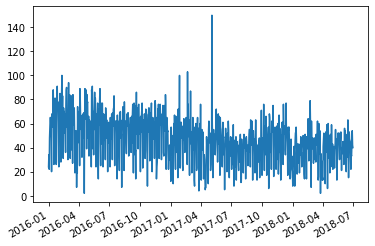

In [70]:
sin_per_day.plot()

<AxesSubplot:>

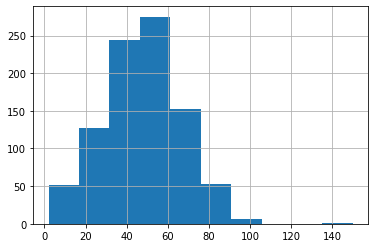

In [71]:
sin_per_day.hist()